In [2]:
import numpy as np
import pandas as pd
import time
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/processed/picture_data.csv").head(100)


C:\Users\user\AppData\Local\Temp\ipykernel_7768\3043511200.py:1: DtypeWarning: Columns (9,12,13,14,18,22,23,24,25,27,30,31,33,34,35,37,38,39,41,42,44,46,51,52,53,56,58,59,60,63,64,65,66,68,72,73,74,76,77,78,79,80,81,82,85,86,89,91,92,93,94,95,99,100,101,102,103,104,106,107,108,109,111,112,113,114,115,116,117,118,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,137,138,139,140,142,144,145,146,147,148,149,151,152,153,154,156,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,183,186,187,188,189,190,191,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,218,219,220,221,222,223,224,225,226,227,228,229,231,232,233,234,235,238,239,240,241,242,243,244,245,246,247,248,249,253,254,255,256,257,258,259,265,266,267,268,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,298,299,300,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,32

# Pre-Processing

### Parse to string

In [4]:
df = df.astype('string')

### Standaring Columns

In [5]:
new_columns =list(map(lambda col:col.lower().replace(' ','_'),df.columns.to_list()))
df.columns = new_columns


### Inspecting data

In [6]:
df.head()

,url,category,index,filename,title,creator,date_created,external_link,medium,object_credit,...,additional_artist_death_date,additional_artist_birth_date,alternate_titles,scientist,catalogue_reference,additional_artist_details,"painter,_printmaker",artist_death_place,maker,frame
0,https://lh3.googleusercontent.com/ci/AC_FhM_oa...,WHITE,0,0.jpg,"Symphony in White, No. 1 The White Girl",James McNeill Whistler,1862,For more information about this and thousand...,oil on canvas,Harris Whittemore Collection,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,https://lh3.googleusercontent.com/ci/AC_FhM9f2...,WHITE,1,1.jpg,The Cradle,<NA>,1872,http//www.musee-orsay.fr/en/collections/work...,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,https://lh3.googleusercontent.com/ci/AC_FhM8sQ...,WHITE,2,2.jpg,The Magpie,<NA>,1868 - 1869,http//www.musee-orsay.fr/en/collections/work...,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,https://lh3.googleusercontent.com/ci/AC_FhM9aa...,WHITE,3,3.jpg,Summer evening on Skagen Sønderstrand,Peder Severin Krøyer,1893,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,https://lh3.googleusercontent.com/ci/AC_FhM-xJ...,WHITE,4,4.jpg,"Composition with red, yellow and blue",Piet Mondriaan,1927,Collection searcher,Oil on canvas,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Describe Data

In [11]:
print('There are exist:',len(df.columns.to_list()), 'columns')

There are exist: 501 columns


**url:** the url of image source

**index:** identifier of image

**filename:** painting filename

**title:** painting title

**date created:** date the painting was created

**external link:** external link

**medium:** artistic technique

, 'category', 'index', 'filename', 'Title', 'Creator', 'Date Created', 'External Link', 'Medium', 'Object Credit', 'Dimensions', 'Classification', 'Artist School', 'Artist Nationality', 'Artist Details', 'Provenance', 'Physical Dimensions', 'Painter', 'Original Title', 'Credit Line', 'Type', 'Rights']

# Data exploration

In [24]:
# TODO visual analiis

In [14]:
df_nulls = df.isnull().sum().to_frame()
df_nulls['column'] = df_nulls.index

In [26]:
junk_columns =df_nulls[df_nulls[0]>90]['column'].values.tolist()

In [27]:
df.drop(junk_columns,axis=1)

,url,index,filename,title,creator,date_created,medium,type,rights,date
0,https://lh3.googleusercontent.com/ci/AC_FhM_oa...,0,0.jpg,"Symphony in White, No. 1 The White Girl",James McNeill Whistler,1862,oil on canvas,<NA>,<NA>,<NA>
1,https://lh3.googleusercontent.com/ci/AC_FhM9f2...,1,1.jpg,The Cradle,<NA>,1872,<NA>,Oil on canvas,"© Musée d'Orsay, dist.RMN / Patrice Schmidt",<NA>
2,https://lh3.googleusercontent.com/ci/AC_FhM8sQ...,2,2.jpg,The Magpie,<NA>,1868 - 1869,<NA>,Oil on canvas,"© Musée d'Orsay, dist.RMN / Patrice Schmidt",<NA>
3,https://lh3.googleusercontent.com/ci/AC_FhM9aa...,3,3.jpg,Summer evening on Skagen Sønderstrand,Peder Severin Krøyer,1893,<NA>,Oil on canvas,"Skagens Museum, Skagens Museum",<NA>
4,https://lh3.googleusercontent.com/ci/AC_FhM-xJ...,4,4.jpg,"Composition with red, yellow and blue",Piet Mondriaan,1927,Oil on canvas,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
95,https://lh3.googleusercontent.com/ci/AC_FhM8ZD...,95,95.jpg,The Virtue Wagon,Paul Klee,1922,Oil transfer drawing and watercolor on prepar...,Drawing,"Gift of the Friends of Art, Gift of the Frie...",<NA>
96,https://lh3.googleusercontent.com/ci/AC_FhM-XS...,96,96.jpg,Fire Bridge,Robert Indiana,<NA>,Oil on canvas,Painting,© 2006 Morgan Art Foundation Ltd. / Artists R...,1964/1965
97,https://lh3.googleusercontent.com/ci/AC_FhM_XZ...,97,97.jpg,Oil Lamp,New England Glass Company,1830–40,Pressed and free-blown white opaque glass,Oil lamp,<NA>,<NA>
98,https://lh3.googleusercontent.com/ci/AC_FhM9do...,98,98.jpg,Portrait of Princess Elisabeth of Saxony,Lucas Cranach the Younger,<NA>,"Brush, sketched in brown, face and plait of h...",Paper,<NA>,1564


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  3 non-null      string
 1   category             3 non-null      string
 2   index                3 non-null      string
 3   filename             3 non-null      string
 4   title                3 non-null      string
 5   creator              1 non-null      string
 6   date_created         3 non-null      string
 7   external_link        3 non-null      string
 8   medium               1 non-null      string
 9   object_credit        1 non-null      string
 10  dimensions           1 non-null      string
 11  classification       1 non-null      string
 12  artist_school        1 non-null      string
 13  artist_nationality   1 non-null      string
 14  artist_details       1 non-null      string
 15  provenance           2 non-null      string
 16  physical_dim

['url', 'category', 'index', 'filename', 'Title', 'Creator', 'Date Created', 'External Link', 'Medium', 'Object Credit', 'Dimensions', 'Classification', 'Artist School', 'Artist Nationality', 'Artist Details', 'Provenance', 'Physical Dimensions', 'Painter', 'Original Title', 'Credit Line', 'Type', 'Rights']


In [23]:
img_names = df_union["filename"].values.tolist()
img_names

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '25.jpg',
 '26.jpg',
 '27.jpg',
 '28.jpg',
 '29.jpg',
 '30.jpg',
 '31.jpg',
 '32.jpg',
 '33.jpg',
 '34.jpg',
 '35.jpg',
 '36.jpg',
 '37.jpg',
 '38.jpg',
 '39.jpg',
 '40.jpg',
 '41.jpg',
 '42.jpg',
 '43.jpg',
 '44.jpg',
 '45.jpg',
 '46.jpg',
 '47.jpg',
 '48.jpg',
 '49.jpg',
 '50.jpg',
 '51.jpg',
 '52.jpg',
 '53.jpg',
 '54.jpg',
 '55.jpg',
 '56.jpg',
 '57.jpg',
 '58.jpg',
 '59.jpg',
 '60.jpg',
 '61.jpg',
 '62.jpg',
 '63.jpg',
 '64.jpg',
 '65.jpg',
 '66.jpg',
 '67.jpg',
 '68.jpg',
 '69.jpg',
 '70.jpg',
 '71.jpg',
 '72.jpg',
 '73.jpg',
 '74.jpg',
 '75.jpg',
 '76.jpg',
 '77.jpg',
 '78.jpg',
 '79.jpg',
 '80.jpg',
 '81.jpg',
 '82.jpg',
 '83.jpg',
 '84.jpg',
 '85.jpg',
 '86.jpg',
 '87.jpg',
 '88.jpg',
 '89.jpg',
 '90.jpg',
 '91.jpg'

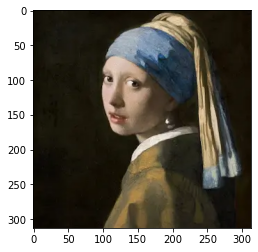

In [27]:
base_path = "../data/final/img/"

img = cv.imread(base_path + img_names[0])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [31]:
images = list(map(lambda name: cv.imread(base_path+name), img_names[:5]))

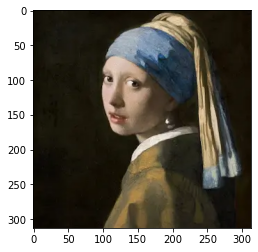

In [32]:
img = images[0]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [40]:
def featuresExtraction(img):
    img=img/255
    (B, G, R) = cv.split(img) #separa la imagen en sus 3 canales
    return (img.mean(), B.mean(), G.mean(),R.mean(),img.std(),B.std(), G.std(),R.std())

In [42]:
features = list(map(featuresExtraction, images))
df = pd.DataFrame(features, columns =["mean", "mean_blue", "mean_green","mean_red","std","std_blue", "std_green","std_red"])
df

,mean,mean_blue,mean_green,mean_red,std,std_blue,std_green,std_red
0,0.201031,0.160486,0.210015,0.232591,0.211409,0.197597,0.205891,0.223438
1,0.377855,0.308055,0.399703,0.425807,0.259262,0.217544,0.266079,0.275459
2,0.256195,0.200427,0.280803,0.287354,0.167183,0.141550,0.167680,0.176098
3,0.243131,0.218319,0.241783,0.269293,0.156346,0.112639,0.148858,0.192832
4,0.154493,0.094945,0.149744,0.218791,0.173433,0.134489,0.158933,0.197959


In [46]:
#ToDo: Add id to new dataframes 
df_final = pd.concat([df_union,df], axis=1)
df_final.head(6)

,filename,category,mean,mean_blue,mean_green,mean_red,std,std_blue,std_green,std_red
0,0.jpg,BLACK,0.201031,0.160486,0.210015,0.232591,0.211409,0.197597,0.205891,0.223438
1,1.jpg,BLACK,0.377855,0.308055,0.399703,0.425807,0.259262,0.217544,0.266079,0.275459
2,2.jpg,BLACK,0.256195,0.200427,0.280803,0.287354,0.167183,0.141550,0.167680,0.176098
3,3.jpg,BLACK,0.243131,0.218319,0.241783,0.269293,0.156346,0.112639,0.148858,0.192832
4,4.jpg,BLACK,0.154493,0.094945,0.149744,0.218791,0.173433,0.134489,0.158933,0.197959
5,5.jpg,BLACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
